# Drug/Alcohol Use by State
## Jonathan Licht and Jim Haines
### https://jlicht27.github.io/

# Overview

Our team members Jim Haines and Jonathan Licht have chosen to analyze the effects of drug usage on crime rates in the United States. We considered 2 data sets, [the first](https://corgis-edu.github.io/corgis/csv/drugs/) containing data on usage rates of alcohol, tobacco, cocaine, and marijuana by state for the years 2002 to 2018. [The second](https://corgis-edu.github.io/corgis/csv/state_crime/) data set contains data on crime rates from 1960 to 2019. The crimes included in the dataset are three property related crimes: burglary, larceny, and theft of motor vehicle and four violent crimes: assault, murder, rape, and robbery. We initially want to see if there is a relationship between drug use and crime rates, and if so, determine if drug usage rates be used to effectively predict future crime rates.

We cleaned up our datasets by removing unnecessary columns like the raw total number of users of each drug. We only considered the usage rates of each drug to account for differeneces in populations between states. 

# Necessary?

From this initial dataset we hope to answer the question of what states have higher usage rates of drugs? From there we will include more datasets in an attempt to identify why these states have higher usage rates as well as what the impact of these higher usage rates is. We feel that this dataset is a good starting point from which we can draw from many other datasets to make connections. Drug usage rates can be attributed to many factors. We hope to find and explain at least some of these factors by using related data sets. One of our current hypotheses involves using drugs as an escape or as a distraction, a rationalization that may be more prevalent in people who live in more rural areas and thus have less social interaction. Drug usage can also have a large impact on societies, and we believe that looking at usage by state may offer some insight into the consequences of higher or lower usage rates. We have considered some preliminary ideas for other data sets to include. One such is incarceration rates for drug usage/position by state. This data might help explain the overall impact drug usage has had on a certain state over time. Another possible data set is one containing data on family situation by state. We would look for a dataset that details income, family size, parenting situation, location of residence, and possibly more factors in an attempt to draw connections between these attributes and drug usage rates/incarceration rates as previously explained.

In order to make the data more usable, we will create a method to obtain a copy of a certain section that is relevant to our current analysis. One example of this is excluding the actual population values from the data table because these values are not very useful. Our table conforms with tidy data guidelines and we did not have to change many aspects to achieve this. We decided that the State and Year are the best options by which to index the data in most situations. This ensures there are no repeated indexes and allows us to clearly see both changes by state and over time. 

## Collaboration plan
We will use a GitHub repository to store our data and notebook that contains our analysis. We are using a jupyter notebook to conduct the majority of our analysis. We have used tools like pandas and matplotlib to provide some summary stats, and we plan to use other plotting software like Seaborn to make clear and concise visualizations. The final version of our project will be available on a github.io webpage that is linked above.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from more_itertools import powerset
from tqdm import tqdm


drugs = pd.read_csv("drugs.csv")
crimes = pd.read_csv("state_crime.csv")

Below, find the tables we just imported.

In [2]:
drugs.head()

,State,Year,Population.12-17,Population.18-25,Population.26+,Totals.Alcohol.Use Disorder Past Year.12-17,Totals.Alcohol.Use Disorder Past Year.18-25,Totals.Alcohol.Use Disorder Past Year.26+,Rates.Alcohol.Use Disorder Past Year.12-17,Rates.Alcohol.Use Disorder Past Year.18-25,...,Totals.Marijuana.Used Past Year.26+,Rates.Marijuana.Used Past Year.12-17,Rates.Marijuana.Used Past Year.18-25,Rates.Marijuana.Used Past Year.26+,Totals.Tobacco.Use Past Month.12-17,Totals.Tobacco.Use Past Month.18-25,Totals.Tobacco.Use Past Month.26+,Rates.Tobacco.Use Past Month.12-17,Rates.Tobacco.Use Past Month.18-25,Rates.Tobacco.Use Past Month.26+
0,Alabama,2002,380805,499453,2812905,18,68,138,0.048336,0.136490,...,141,0.127535,0.237880,0.050275,63,226,930,0.166578,0.451976,0.330659
1,Alaska,2002,69400,62791,368460,4,12,27,0.061479,0.187891,...,46,0.188730,0.389026,0.124566,11,30,112,0.163918,0.484270,0.304220
2,Arizona,2002,485521,602265,3329482,36,117,258,0.073819,0.193626,...,215,0.169646,0.275435,0.064640,73,240,1032,0.151071,0.397968,0.309969
3,Arkansas,2002,232986,302029,1687337,14,53,101,0.061457,0.175913,...,104,0.157567,0.288856,0.061510,46,169,660,0.195714,0.558846,0.391210
4,California,2002,3140739,3919577,21392421,173,581,1298,0.055109,0.148312,...,1670,0.141067,0.282887,0.078068,290,1377,4721,0.092235,0.351353,0.220699


In [3]:
crimes.head()

,State,Year,Data.Population,Data.Rates.Property.All,Data.Rates.Property.Burglary,Data.Rates.Property.Larceny,Data.Rates.Property.Motor,Data.Rates.Violent.All,Data.Rates.Violent.Assault,Data.Rates.Violent.Murder,...,Data.Rates.Violent.Robbery,Data.Totals.Property.All,Data.Totals.Property.Burglary,Data.Totals.Property.Larceny,Data.Totals.Property.Motor,Data.Totals.Violent.All,Data.Totals.Violent.Assault,Data.Totals.Violent.Murder,Data.Totals.Violent.Rape,Data.Totals.Violent.Robbery
0,Alabama,1960,3266740,1035.4,355.9,592.1,87.3,186.6,138.1,12.4,...,27.5,33823,11626,19344,2853,6097,4512,406,281,898
1,Alabama,1961,3302000,985.5,339.3,569.4,76.8,168.5,128.9,12.9,...,19.1,32541,11205,18801,2535,5564,4255,427,252,630
2,Alabama,1962,3358000,1067.0,349.1,634.5,83.4,157.3,119.0,9.4,...,22.5,35829,11722,21306,2801,5283,3995,316,218,754
3,Alabama,1963,3347000,1150.9,376.9,683.4,90.6,182.7,142.1,10.2,...,24.7,38521,12614,22874,3033,6115,4755,340,192,828
4,Alabama,1964,3407000,1358.7,466.6,784.1,108.0,213.1,163.0,9.3,...,29.1,46290,15898,26713,3679,7260,5555,316,397,992


Below, find all the dtypes for the table. Pandas correctly interpretted all of them.

In [4]:
drugs.dtypes

State                                                 object
Year                                                   int64
Population.12-17                                       int64
Population.18-25                                       int64
Population.26+                                         int64
Totals.Alcohol.Use Disorder Past Year.12-17            int64
Totals.Alcohol.Use Disorder Past Year.18-25            int64
Totals.Alcohol.Use Disorder Past Year.26+              int64
Rates.Alcohol.Use Disorder Past Year.12-17           float64
Rates.Alcohol.Use Disorder Past Year.18-25           float64
Rates.Alcohol.Use Disorder Past Year.26+             float64
Totals.Alcohol.Use Past Month.12-17                    int64
Totals.Alcohol.Use Past Month.18-25                    int64
Totals.Alcohol.Use Past Month.26+                      int64
Rates.Alcohol.Use Past Month.12-17                   float64
Rates.Alcohol.Use Past Month.18-25                   float64
Rates.Alcohol.Use Past M

In [5]:
crimes.dtypes

State                             object
Year                               int64
Data.Population                    int64
Data.Rates.Property.All          float64
Data.Rates.Property.Burglary     float64
Data.Rates.Property.Larceny      float64
Data.Rates.Property.Motor        float64
Data.Rates.Violent.All           float64
Data.Rates.Violent.Assault       float64
Data.Rates.Violent.Murder        float64
Data.Rates.Violent.Rape          float64
Data.Rates.Violent.Robbery       float64
Data.Totals.Property.All           int64
Data.Totals.Property.Burglary      int64
Data.Totals.Property.Larceny       int64
Data.Totals.Property.Motor         int64
Data.Totals.Violent.All            int64
Data.Totals.Violent.Assault        int64
Data.Totals.Violent.Murder         int64
Data.Totals.Violent.Rape           int64
Data.Totals.Violent.Robbery        int64
dtype: object

## Some useful functions

In [6]:
def get_columns(dataframe, key, num):
    to_be_dropped = []

    for col in list(dataframe.columns)[num:]: # never drop certain columns
        if key not in col:
            to_be_dropped.append(col)
                    
    return dataframe.drop(to_be_dropped, axis=1)

def get_not_columns(dataframe, key, num):
    to_be_dropped = []

    for col in list(dataframe.columns)[num:]: # never drop certain columns
        if key in col:
            to_be_dropped.append(col)
                    
    return dataframe.drop(to_be_dropped, axis=1)

In [7]:
def graph_drug(df, cols, labels, ylim):
    
    fig, axes = plt.subplots(1,3)

    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    def subgraph(col, ax, label, ylim):
        df.set_index("Year").groupby("State")[col].plot.line(
            ylim=(0, ylim), alpha=0.7, fontsize=14, ax=ax);

        ax.set_xlabel("Year", fontsize=15);
        ax.set_ylabel("Fraction", fontsize=15);
        ax.set_title(label, fontsize=15);
        ax.tick_params(labelrotation=45)
        
    for i in range(3):
        subgraph(cols[i], axes[i], labels[i], ylim)

    return fig.tight_layout()

In [8]:
def capitalize(string):
    return str.upper(string[0]) + string[1:]

In [9]:
def regress(df, labels, xs, y):
    
    fig, axes = plt.subplots(1,3)
    fig.set_figheight(5)
    fig.set_figwidth(15)
    
    def subplot(label, x, ax):
        res = stats.linregress(df[x], df[y])
        title = "Slope: " + str(np.round(res.slope, 3))
        
        df.plot.scatter(x=x, y=y, ax=ax);
        ax.plot(df[x], res.intercept + res.slope*df[x], color="red")
        
        ax.set_xlabel(label, fontsize=12);
        ax.set_ylabel(capitalize(y), fontsize=12);
        ax.set_title(title, fontsize=15);
        ax.set_xlim((-2,2))
        ax.set_ylim((-2,2))
        
        
    for i in range(3):
        subplot(labels[i], xs[i], axes[i])
        
    return fig.tight_layout()

In [10]:
def graph_coefs(df, xs):
    ys = ["burglary", "larceny", "motor", "assault", "murder", "rape", "robbery"]

    #blue-ish for property, red-ish for violent
    colors = ["lightsteelblue", "deepskyblue", "royalblue", "darksalmon", "red", "darkorange", "firebrick"]

    # we then get the coefficients for every combination
    all_coefs = pd.DataFrame({"Crime": ys})
    all_coefs.set_index("Crime", inplace=True)
    for x in xs:
        coefs = []
        for y in ys:
            res = stats.linregress(df[x], df[y])
            coefs.append(res.slope)
        all_coefs[x] = coefs
    all_coefs = all_coefs.transpose()
    all_coefs.reset_index(inplace=True)

    # we plot those results here
    fig, ax = plt.subplots()

    for i in range(len(ys)):
        all_coefs.plot.scatter(x="index", y=ys[i], ax=ax, marker='o', color=colors[i], s=100, alpha=0.65)
        
    plt.legend(ys)
    ax.set_ylabel("Coefficients Between Acohol Use and Crime");
    fig.set_figheight(5)
    ax.set_ylim((-1,1))
    fig.set_figwidth(15)
    fig.set_figheight(6)

In [11]:
def get_scaled_state(df, state):
    s = df[df["State"] == state]
    return pd.concat([s.iloc[:, :2], stats.zscore(s.iloc[:, 2:])], axis=1)

## Data Preprocessing

In [12]:
# get just percentages
drugs_pct = get_columns(drugs, "Rates", 2)

In [13]:
# rename columns
drugs_pct.rename(columns={
    "Rates.Alcohol.Use Disorder Past Year.12-17": "alcoholism past year:12-17",
    "Rates.Alcohol.Use Disorder Past Year.18-25": "alcoholism past year:18-25",
    "Rates.Alcohol.Use Disorder Past Year.26+": "alcoholism past year:26+",
    "Rates.Alcohol.Use Past Month.12-17": "alcohol used past month:12-17",
    "Rates.Alcohol.Use Past Month.18-25": "alcohol used past month:18-25",
    "Rates.Alcohol.Use Past Month.26+": "alcohol used past month:26+",
    
    "Rates.Illicit Drugs.Cocaine Used Past Year.12-17": "cocaine used past year:12-17",
    "Rates.Illicit Drugs.Cocaine Used Past Year.18-25": "cocaine used past year:18-25",
    "Rates.Illicit Drugs.Cocaine Used Past Year.26+": "cocaine used past year:26+",
    
    "Rates.Marijuana.Used Past Month.12-17": "marijuana used past month:12-17",
    "Rates.Marijuana.Used Past Month.18-25": "marijuana used past month:18-25",
    "Rates.Marijuana.Used Past Month.26+": "marijuana used past month:26+",
    "Rates.Marijuana.Used Past Year.12-17": "marijuana used past year:12-17",
    "Rates.Marijuana.Used Past Year.18-25": "marijuana used past year:18-25",
    "Rates.Marijuana.Used Past Year.26+": "marijuana used past year:26+",
    
    "Rates.Tobacco.Use Past Month.12-17": "tobacco used past month:12-17",
    "Rates.Tobacco.Use Past Month.18-25": "tobacco used past month:18-25",
    "Rates.Tobacco.Use Past Month.26+": "tobacco used past month:26+",
}, inplace=True)

In [14]:
# get alochol related things
alcohol_pct = get_columns(drugs_pct, "alcohol", 2)

# get tobacco related things
tobacco_pct = get_not_columns(get_columns(drugs_pct, "tobacco", 2), "Cigarette", 2)

# get cocaine related things
cocaine_pct = get_columns(drugs_pct, "cocaine", 2)

# get marijuana related things
marijuana_pct = get_not_columns(get_columns(drugs_pct, "marijuana", 2), "New Users", 2)

In [15]:
# rename columns
crimes.rename(columns={
    "Data.Rates.Property.Burglary": "burglary",
    "Data.Rates.Property.Larceny": "larceny",
    "Data.Rates.Property.Motor": "motor",
    "Data.Rates.Violent.Assault": "assault",
    "Data.Rates.Violent.Murder": "murder",
    "Data.Rates.Violent.Rape": "rape",
    "Data.Rates.Violent.Robbery": "robbery"
},inplace=True)

In [16]:
crimes_pct = get_not_columns(crimes, "Data", 2)

# Alcohol

In this section we analyze alcohol use and alcoholism in the United States by age group, over time, and by state.

In the cell below, we establish the range of alcohol abuse usage rates. This summary statistic offers a preliminary insight into what states may have high or low usage rates for other drugs. It also poses questions to answer about the states with the most extreme values. For example, what aspect of North Dakota in 2003 made the alcohol usage rate so high, and has it changed since then? The following calculations were done with the age rage of 18-25.

In [17]:
print('State with highest alcohol use rate from 2002 to 2018:', 
      str(alcohol_pct.set_index(["State", "Year"])["alcoholism past year:18-25"].idxmax()) + 
      ',', alcohol_pct.set_index(["State", "Year"])["alcoholism past year:18-25"].max())

print('State with lowest alcohol use rate from 2002 to 2018:', 
      str(alcohol_pct.set_index(["State", "Year"])["alcoholism past year:18-25"].idxmin()) + 
      ',', alcohol_pct.set_index(["State", "Year"])["alcoholism past year:18-25"].min())

State with highest alcohol use rate from 2002 to 2018: ('North Dakota', 2003), 0.272941
State with lowest alcohol use rate from 2002 to 2018: ('Florida', 2018), 0.071218


In the cell below we find the mean of alcohol usage rates accross all states from 2002 to 2018 to be about 15.12%. This summary statistic is a measure of centrality can can be used as a reference point to compare states to. This allows us to make realizations such as whether or not a state may be considered a "heavy drinking state."

In [18]:
alcohol_pct['alcoholism past year:18-25'].mean()

0.15118001384083027

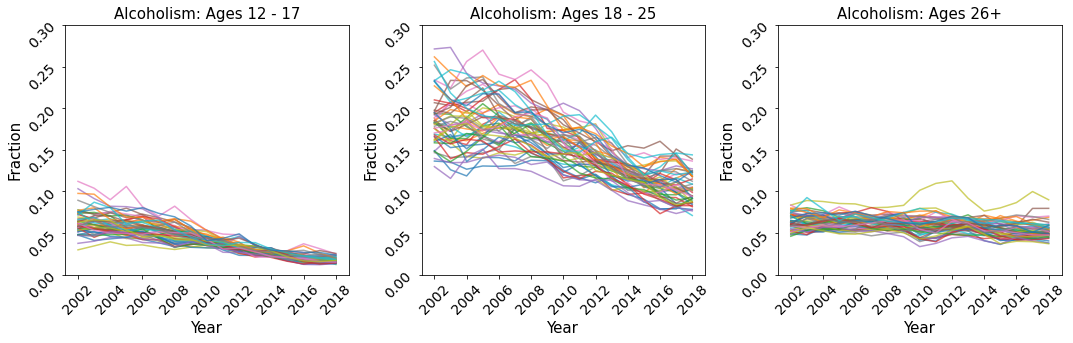

In [19]:
cols = ["alcoholism past year:12-17", "alcoholism past year:18-25", "alcoholism past year:26+"]
labels = ["Alcoholism: Ages 12 - 17", "Alcoholism: Ages 18 - 25", "Alcoholism: Ages 26+"]

graph_drug(alcohol_pct, cols, labels, 0.3)

### Interpretation
As you can see in the previous subplot, alcoholism varies greatly by age range. Each line represents a state. For early teens, the alcohol disorder rate has dropped in all states in a similar fashion. In the 18 to 25 age range, this varies greatly by state. However, the rate is still decreasing over time. Finally, for the 26+ age range, the rate has stayed fairly consistent over the years. Additionally, all states hover around a similar rate.

# Tobacco

In this section we analyze tobacco use in the United States by age group, over time, and by state.

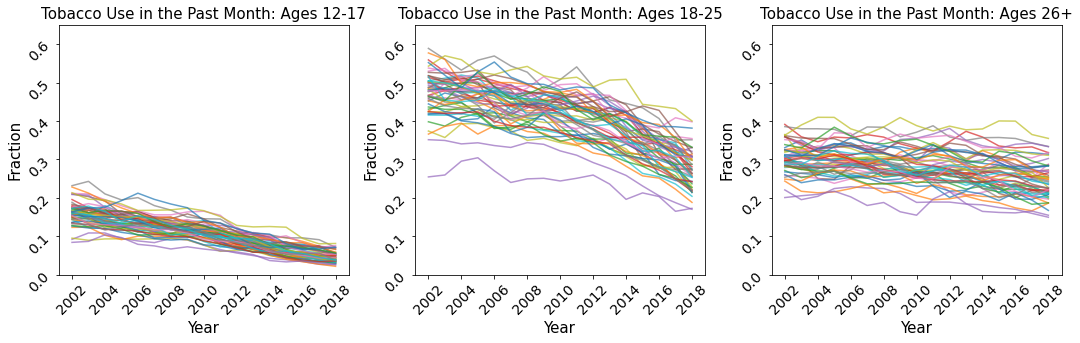

In [20]:
cols = ["tobacco used past month:12-17", "tobacco used past month:18-25", "tobacco used past month:26+"]
labels = ["Tobacco Use in the Past Month: Ages 12-17", "Tobacco Use in the Past Month: Ages 18-25", "Tobacco Use in the Past Month: Ages 26+"]

graph_drug(tobacco_pct, cols, labels, 0.65)

### Interpretation
In the sublot above we provide a similar overview of tobacco use in the past month across age ranges and states. We see a significant nationwide decrease in tobacco use among the 12-17 age range. One possible factor of this decrease is the introduction ofartificial vape devices that offer an alternative method of nicotine intake, the addictive ingredient in tobacco. The 18-25 age range has also seen a decrease across most states, but have the highest rates overall among the three age groups. This is likely due to the historic prevelance of nicotine among teenagers, which has also been affected by the introduction of vape devices. Finally, the 26+ age range has maintained steady rates overtime, but have a greater variance by state.

# Cocaine

In this section we analyze cocaine use in the United States by age group, over time, and by state.

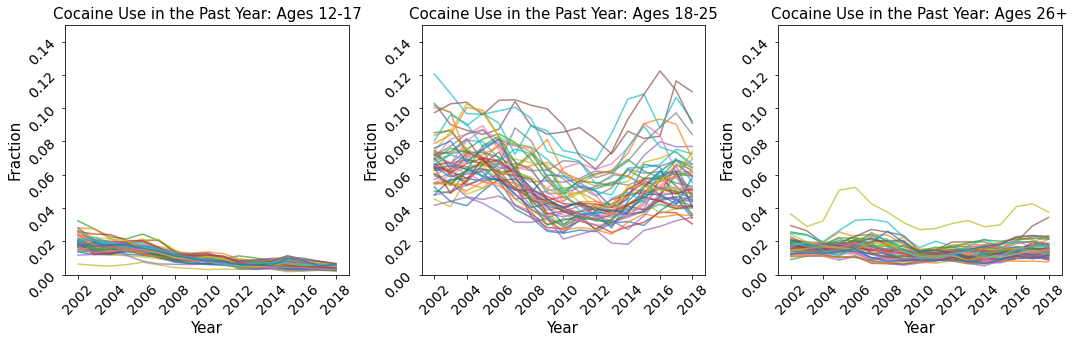

In [21]:
cols = ["cocaine used past year:12-17", "cocaine used past year:18-25", "cocaine used past year:26+"]
labels = ["Cocaine Use in the Past Year: Ages 12-17", "Cocaine Use in the Past Year: Ages 18-25", "Cocaine Use in the Past Year: Ages 26+"]

graph_drug(cocaine_pct, cols, labels, 0.15)

### Interpretation
Cocaine has the lowest usage rates of all four drugs in our analysis. The 12-17 range has decreased since 2002 although usage rates were never very high in this age group. The 18-25 range has by far the highest rates and greatest range of usage rate between states. States vary greatly in rates, and this is something we will analyze after this overview. The 26 plus range also has lower rates than the 18-25 range. They have one outlier with much higher usage rates, District of Columbia, which peaked in 2006 with a usage rate in the past year of 0.052488. The general trend has remaied fairly constant over time.

# Marijuana

In this section we analyze marijuana use by age group, over time, and by state.

In [22]:
marijuana_pct.head()

,State,Year,marijuana used past month:12-17,marijuana used past month:18-25,marijuana used past month:26+,marijuana used past year:12-17,marijuana used past year:18-25,marijuana used past year:26+
0,Alabama,2002,0.063662,0.124672,0.025967,0.127535,0.237880,0.050275
1,Alaska,2002,0.110781,0.239907,0.071362,0.188730,0.389026,0.124566
2,Arizona,2002,0.077371,0.151780,0.036657,0.169646,0.275435,0.064640
3,Arkansas,2002,0.079670,0.164807,0.033891,0.157567,0.288856,0.061510
4,California,2002,0.076595,0.160916,0.045736,0.141067,0.282887,0.078068


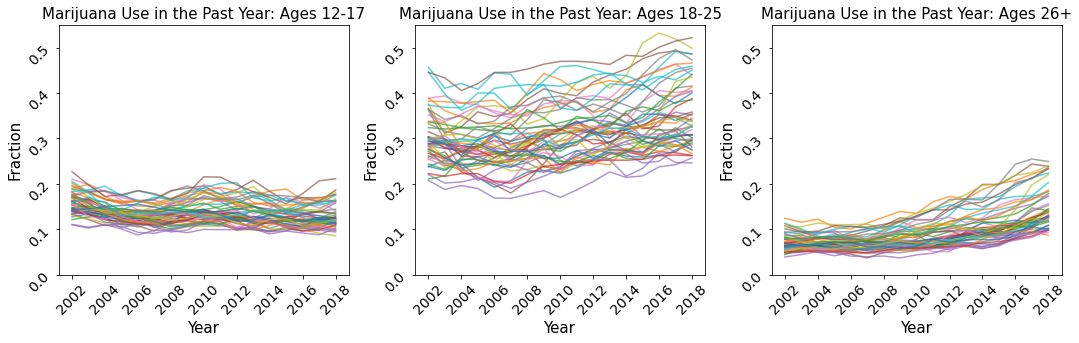

In [23]:
cols = ["marijuana used past year:12-17", "marijuana used past year:18-25", "marijuana used past year:26+"]
labels = ["Marijuana Use in the Past Year: Ages 12-17", "Marijuana Use in the Past Year: Ages 18-25", "Marijuana Use in the Past Year: Ages 26+"]

graph_drug(marijuana_pct, cols, labels, 0.55)

### Interpretation
Marijuana is the only drug we analyzed with an upward trend in multiple agre ranges. The 12-17 age range has remaied similar over time. For ranges 18-25, there is a slight upward trend overall with a high degree of variation between each state. For ages 26+ there is a clear upward trend in all states, although some are increasing at different rates. These increases are likely due to the recent focus on legalization of medical and, in some cases, recreational marijuana use. 

# Crimes

Below, we will introduce an additional dataset that will help us draw meaningful conclusions from multiple datasets. This data came from [this website](https://corgis-edu.github.io/corgis/csv/state_crime/). We read the DataFrame in as "crimes" in the first code cell of this document. Below we display the a few rows of the frame, then we create a "crimes_adj" DataFrame that contains only data relevant to our time period and other dataset. 

This dataset has the same unit of observation as our intial dataset: a state in a certain year. It contains a total population column, then it has data on two different types of crime: property related crimes and violent crimes. It has a column that is an aggregation of each of these two categories, basically a total property crimes rate and a total violent crimes rate, as well as columns for each type of crime within each category. Each entry is the rate of how often that crime was committed in that state in that year.

In [24]:
#this is the df that just has the rates and within the relevant years
crimes_pct = crimes_pct[(crimes_pct.Year >= 2002) & (crimes_pct.Year<=2018)].iloc[:, :12]
crimes_pct.head()

,State,Year,burglary,larceny,motor,assault,murder,rape,robbery
42,Alabama,2002,950.6,2767.0,310.1,268.0,6.8,37.2,133.1
43,Alabama,2003,960.2,2754.1,332.1,251.7,6.6,36.8,134.1
44,Alabama,2004,987.0,2732.4,309.9,249.4,5.6,38.5,133.5
45,Alabama,2005,955.8,2656.0,289.0,248.3,8.2,34.4,141.7
46,Alabama,2006,973.7,2640.8,326.5,227.5,8.3,35.8,153.6


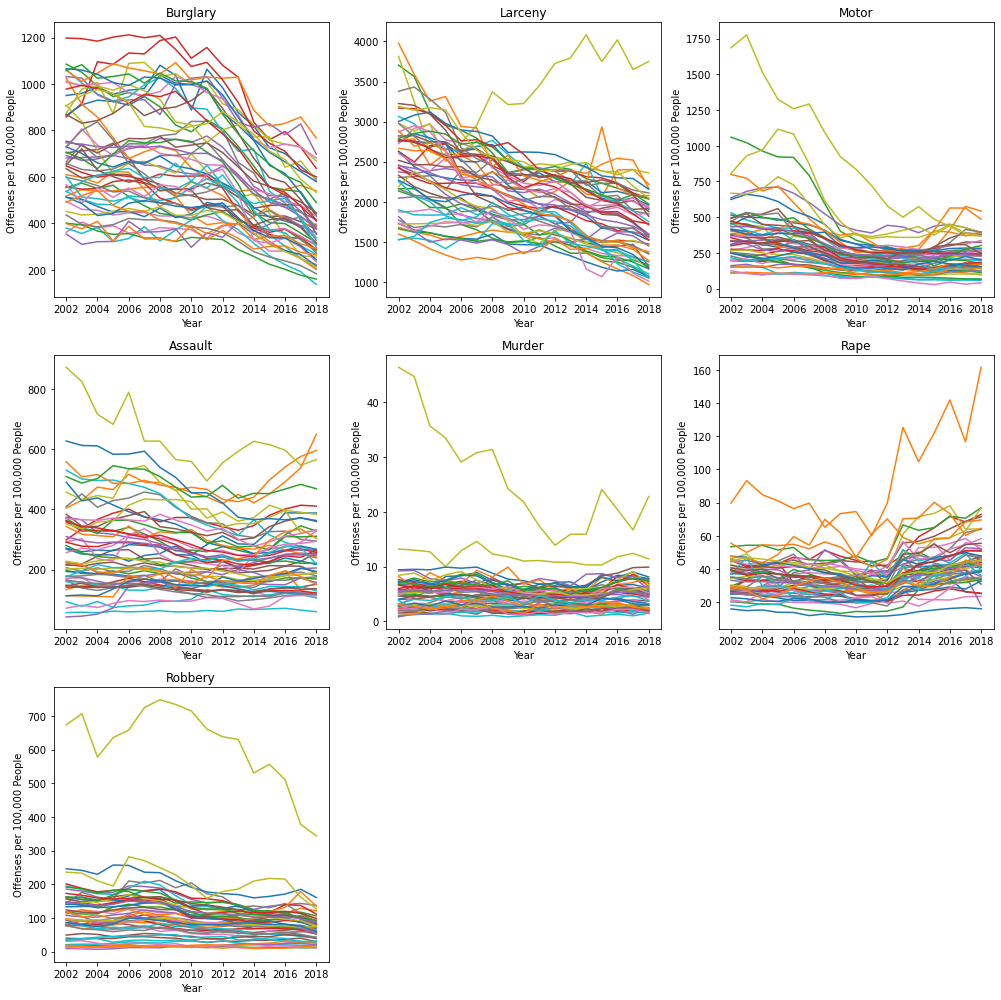

In [25]:
fig, axes = plt.subplots(3,3)
fig.set_figwidth(14)
fig.set_figheight(14)


crimes_list = ["burglary", "larceny", "motor", "assault", "murder", "rape", "robbery"]
starter = crimes_pct.set_index("Year").groupby("State")

counter = 0
for i in range(3):
    for j in range(3):
        if counter < 7:
            starter[crimes_list[counter]].plot.line(ylabel="Offenses per 100,000 People", ax = axes[i][j])
            axes[i][j].set_title(capitalize(crimes_list[counter]))
            counter += 1
            
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
fig.tight_layout()

### Interpretation (THIS INTERPRETATION NEEDS TO CHANGE)
In the graph above we have displayed the total property related crime rates for each state from 2002 to 2018. This graph is meant to provide a simple overview, but we can observe an overall decrease across most states during this time. Again, there is an obvious outlier of Washington DC which has maintained the highest property related crime rate since about 2007. DC peaked with 6409.0 total property related crimes per 100,00 people in 2002.

# Drug/Alcohol Use and Crimes

Now, we will create a DataFrame consisting of alcohol usage rates in the past month merged with relevant crime data. We will use this new DataFrame to observe correlations between alcohol usage rates and crime rates in Lousiana. 

# Country Level

In [26]:
features = list(alcohol_pct.iloc[:, 5:].columns.append(cocaine_pct.iloc[:, 1:].columns).append(tobacco_pct.iloc[:, 2:].columns).append(marijuana_pct.iloc[:, 5:].columns))

merged = drugs_pct.merge(crimes_pct, on = ["State", "Year"], how="inner")

# 8178
# 7814
# 7099
# 5812
all_combos = list(powerset(features))[7099:] #less than 9 features is never optimal

In [27]:

# def get_cv_error(k):
#     model = KNeighborsRegressor(n_neighbors=k)
#     pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
#     mse = np.mean(-cross_val_score(
#         pipeline, x_dict, y, 
#         cv=5, scoring="neg_mean_squared_error"
#     ))
#     return mse


# ys = ["burglary", "larceny", "motor", "assault", "murder", "rape", "robbery"]
# for i in ys:
#     x_dict = merged[features].to_dict(orient="records")
#     y = merged[i]
#     vec = DictVectorizer(sparse=False)
#     scaler = StandardScaler()


#     ks = pd.Series(range(1, 51))
#     ks.index = range(1, 51)
#     test_errs = ks.apply(get_cv_error)

#     num = test_errs.idxmin()
#     print(num)

In [28]:
ys = ["burglary", "larceny", "motor", "assault", "murder", "rape", "robbery"]
for y in ys:
    final_mape = np.inf
    for features in all_combos:

        model = KNeighborsRegressor(n_neighbors=2) # the best value is always 2
        x_train = merged[list(features)]
        y_train = merged[y]
        
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train_sc = scaler.transform(x_train)
        
        model.fit(x_train_sc, y_train)

        y_pred = model.predict(x_train_sc)
        mape = mean_absolute_percentage_error(y_train, y_pred)

        if mape < final_mape:
            final_mape = mape
            final_features = list(features)

    print("crime:", y)
    print("mape:", np.round(final_mape*100, 2), "%")
    print("# of features:", len(final_features))
    print("features:", final_features)
    print("---------------------------------------------------------------------------------")


crime: burglary
mape: 5.47 %
# of features: 12
features: ['alcohol used past month:12-17', 'alcohol used past month:18-25', 'alcohol used past month:26+', 'Year', 'cocaine used past year:12-17', 'cocaine used past year:18-25', 'cocaine used past year:26+', 'tobacco used past month:12-17', 'tobacco used past month:18-25', 'tobacco used past month:26+', 'marijuana used past year:18-25', 'marijuana used past year:26+']
---------------------------------------------------------------------------------
crime: larceny
mape: 3.7 %
# of features: 11
features: ['alcohol used past month:12-17', 'alcohol used past month:18-25', 'alcohol used past month:26+', 'Year', 'cocaine used past year:12-17', 'cocaine used past year:26+', 'tobacco used past month:12-17', 'tobacco used past month:18-25', 'tobacco used past month:26+', 'marijuana used past year:18-25', 'marijuana used past year:26+']
---------------------------------------------------------------------------------
crime: motor
mape: 7.75 %
# of

In [29]:
# Just Trying stuff

# features1 = ['State',
#              'Year',
#              'alcohol used past month:12-17',
#              'alcohol used past month:18-25',
#              'alcohol used past month:26+',
#              'cocaine used past year:12-17',
#              'cocaine used past year:18-25',
#              'cocaine used past year:26+',
#              'tobacco used past month:12-17',
#              'tobacco used past month:18-25',
#              'tobacco used past month:26+',
#              'marijuana used past year:12-17',
#              'marijuana used past year:18-25',
#              'marijuana used past year:26+']

# x_train_dict = merged[features1].to_dict(orient="records")

# x_new_dict = [{'State': 'Alaska',
#               'Year': 2021,
#               'alcohol used past month:12-17': 0.099299,
#               'alcohol used past month:18-25': 0.525318,
#               'alcohol used past month:26+': 0.519158,
#               'cocaine used past year:12-17': 0.002553,
#               'cocaine used past year:18-25': 0.047722,
#               'cocaine used past year:26+': 0.015322,
#               'tobacco used past month:12-17': 0.057981,
#               'tobacco used past month:18-25': 0.30144,
#               'tobacco used past month:26+': 0.310628,
#               'marijuana used past year:12-17': 0.085626,
#               'marijuana used past year:18-25': 0.275676,
#               'marijuana used past year:26+': 0.101697}]


# ys = ["burglary", "larceny", "motor", "assault", "murder", "rape", "robbery"]

# for i in ys:
# #x_train = merged[features[11:14]]

#     y_train = merged[i]


#     vec = DictVectorizer(sparse=False)
#     vec.fit(x_train_dict)
#     x_train = vec.transform(x_train_dict)
#     x_new = vec.transform(x_new_dict)

#     scaler = StandardScaler()
#     scaler.fit(x_train)
#     x_train_sc = scaler.transform(x_train)
#     x_new_sc = scaler.transform(x_new)


#     model = KNeighborsRegressor(n_neighbors=4)
#     model.fit(x_train_sc, y_train)
#     model.predict(x_new_sc)

#     #y_train_pred = model.predict(x_train_sc)
    
    
#     print(i)
#     print(model.predict(x_new_sc))
#     print("mae:", (y_train - y_train_pred).abs().mean())



# Louisiana

In [30]:
merged = drugs_pct.merge(crimes_pct, on=["State", "Year"], how="inner")

In [31]:
la_sc = get_scaled_state(merged, "Louisiana")

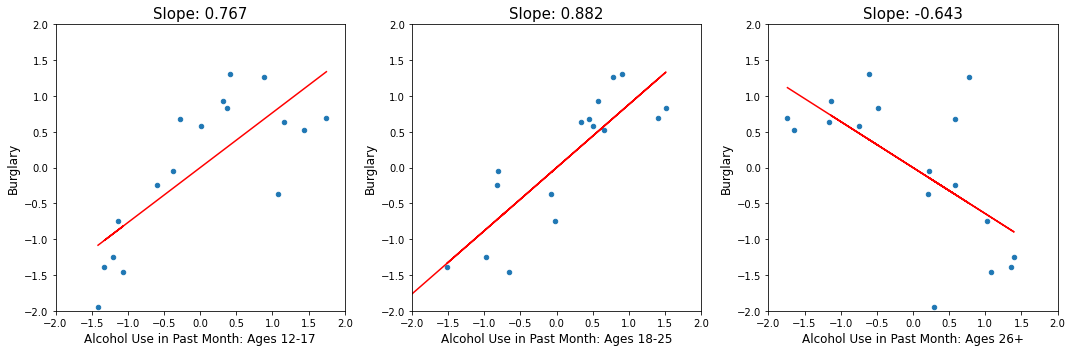

In [32]:
labels = ["Alcohol Use in Past Month: Ages 12-17", "Alcohol Use in Past Month: Ages 18-25", "Alcohol Use in Past Month: Ages 26+"]
xs = ["alcohol used past month:12-17", "alcohol used past month:18-25", "alcohol used past month:26+"]
y = "burglary"

regress(la_sc, labels, xs, y)

In the subplot above, we have used our merged DataFrame to get correlation values between Alcohol usage rate in the past month and burglary rates, across our 3 age ranges. It is important to realize the difference in the x-axis scales of each graph, but the differences will not affect our findings. We can see that the 12-17 age range has a correlation coefficient of 0.7672, while the 18-25 has the largest positive correlation coefficient of the three age ranges: 0.8822. This value represents a strong positive relationship between alcohol use and burglaries among Lousiana residents in this age group. The 26+ age range has a negative correlation coefficient, this indicates an inverse relationship revealing that in Lousiana, people aged 26+ who use alcohol tend to not commit burglary.

In the cell below we will repeat the above process but looking at a different drug and crime type: cocaine and burglary, still in Lousiana.

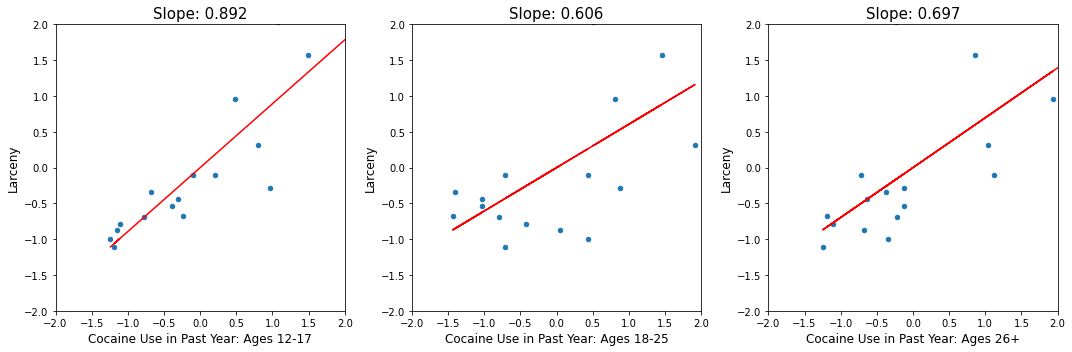

In [33]:
labels = ["Cocaine Use in Past Year: Ages 12-17", "Cocaine Use in Past Year: Ages 18-25", "Cocaine Use in Past Year: Ages 26+"]
xs = ["cocaine used past year:12-17", "cocaine used past year:18-25", "cocaine used past year:26+"]
y = "larceny"

regress(la_sc, labels, xs, y)

# ABOVE IS LARCENY CHANGE INTERPRETATION

It is again important to notice the difference in x-axis scales for each subplot. The 12-17 age range has the highest correlation coefficient of 0.8324, indicating a strong positive relationship of coacine use and robbery among 12-17 year olds in Lousiana. Again, it is important to note that the cocaine usage rates for this age group are far lower than the other 2 ranges. This indicates that while there may be a positive relationship, there are less cocaine users from which to draw this conclusion. The next 2 graphs have similar coefficients, with the 26+ group being slightly higher. A trend we have begun to see is more serious, violent crimes are more common from older drug users. 

Now that we see the type of correlations that these two things have, we can look at all the correlations in a broad view. (look below)

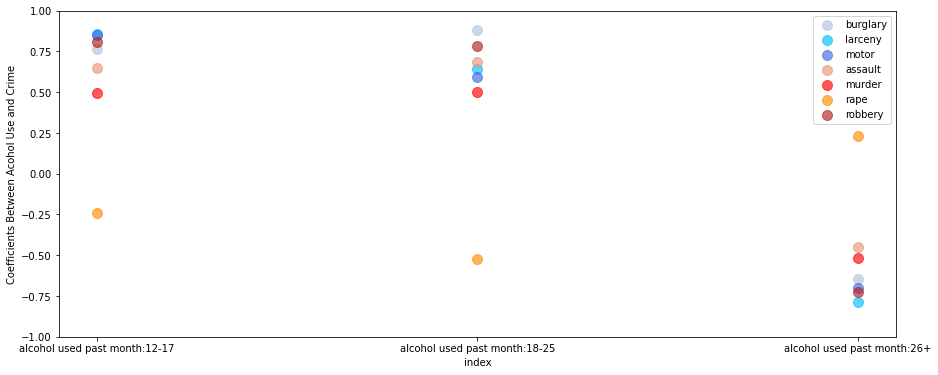

In [34]:
xs = ["alcohol used past month:12-17", "alcohol used past month:18-25", "alcohol used past month:26+"]
graph_coefs(la_sc, xs)

After observing correlations between different drug usage rates and different crimes, we were able to go a step further and look at changes in coefficients (betas) over time. In the graph above we have three age groups on our x axis and coefficient values between alcohol use in the past month and 7 types of crime, listed above. We can see an obvious trend in all but one crime that as a person gets older, alcohol use becomes a less relevant factor in determing if they are likely to commit a crime or not. The two crimes that have not seen any real decrease are murder and rape. These are arguably the most serious and vulgar crimes of those we have analyzed, which may explain why they have not decreased among older age groups. One may reasonably assume that commiting a crime of such magnitude is inherent in a person regardless of age or influence from substances. 

Finally, we recognize our data set is not conducive for a predictive model because the unit of observation is a state in a particular year. Instead, we think an important outcome of our analysis would be to look at the the correlation coefficients and the betas of different drugs and crimes over different age groups. We have started this with the above graph. We hope to bring a similar sort of analysis to different states and for different drugs as well.

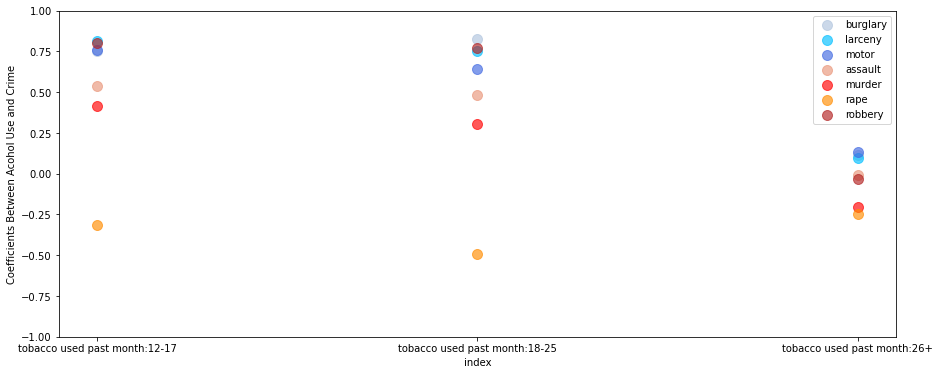

In [35]:
xs = ['tobacco used past month:12-17', 'tobacco used past month:18-25', 'tobacco used past month:26+']
graph_coefs(la_sc, xs)

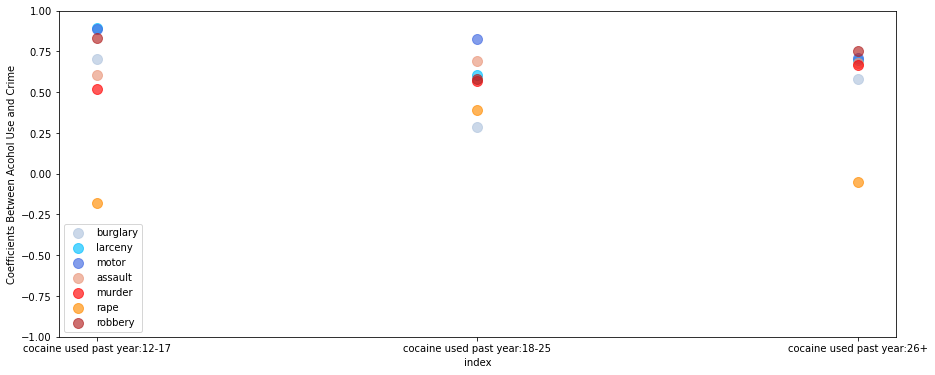

In [36]:
xs = ['cocaine used past year:12-17', 'cocaine used past year:18-25', 'cocaine used past year:26+']
graph_coefs(la_sc, xs)

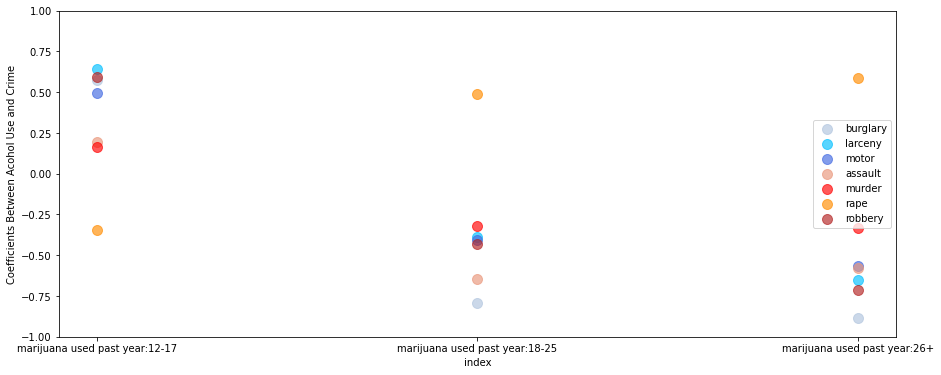

In [37]:
xs = ['marijuana used past year:12-17', 'marijuana used past year:18-25', 'marijuana used past year:26+']
graph_coefs(la_sc, xs)